# 1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 2 Data

In [2]:
df= pd.read_csv("Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


## 2.1 Brief Explanation of the Data:

Columns:

Education: The educational qualifications of employees, including degree, institution, and field of study.

Joining Year: The year each employee joined the company, indicating their length of service.

City: The location or city where each employee is based or works.

Payment Tier: Categorization of employees into different salary tiers.

Age: The age of each employee, providing demographic insights.

Gender: Gender identity of employees, promoting diversity analysis.

Ever Benched: Indicates if an employee has ever been temporarily without assigned work.

Experience in Current Domain: The number of years of experience employees have in their current field.

Leave or Not: a target column



# 3. EDA 

In [3]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.shape

(4653, 9)

In [6]:
print("Columns:")
print(df.columns)

Columns:
Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')


In [7]:
print("Unique Values:")
print(df.nunique())

Unique Values:
Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64


# 3.1 Categorical Data Distribution

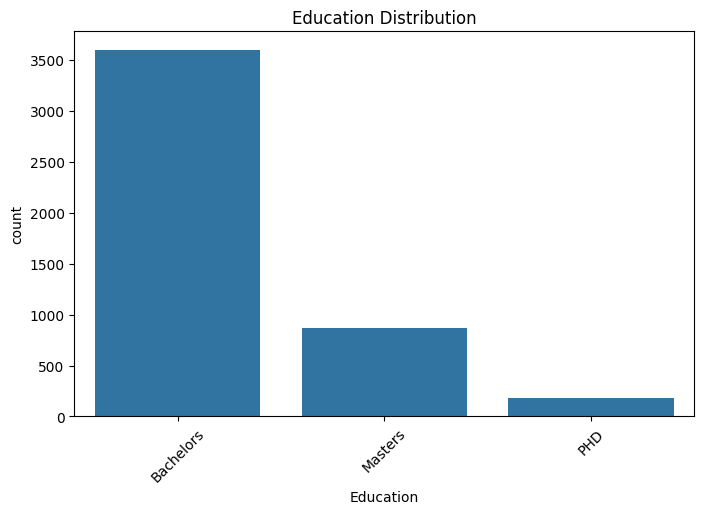

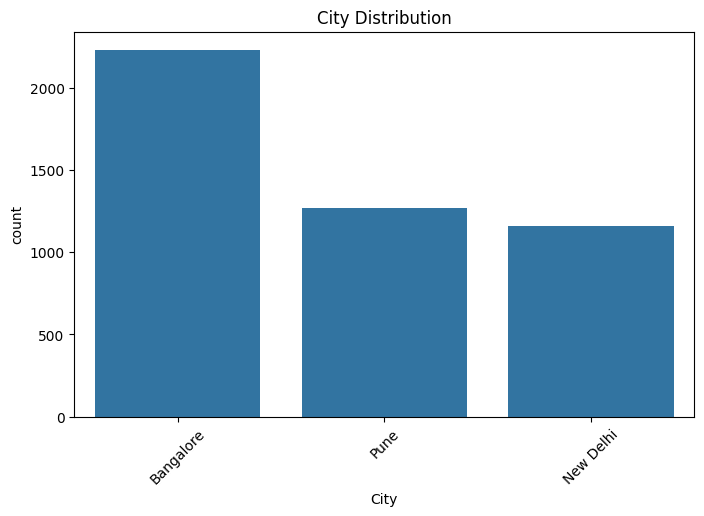

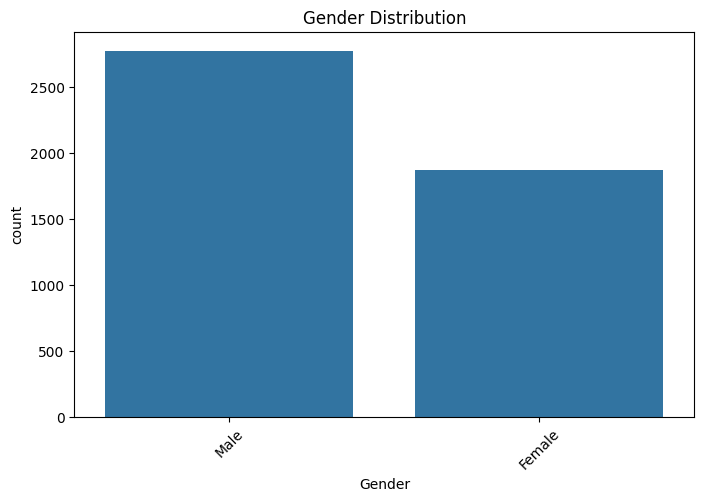

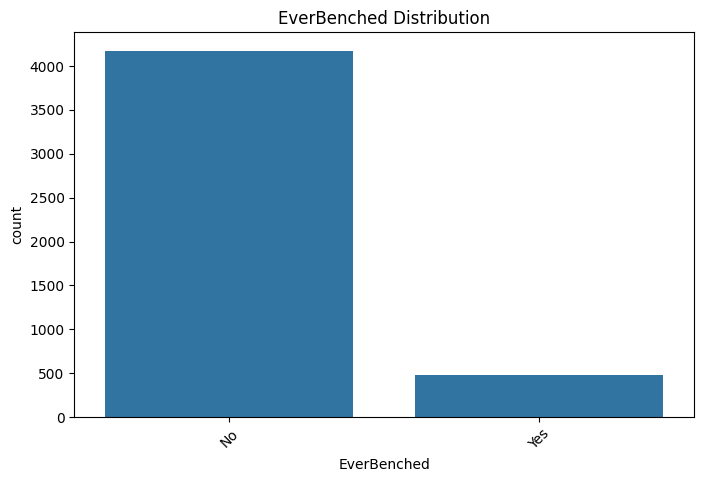

In [8]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()


In [9]:
categorical_columns

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes
...,...,...,...,...
4648,Bachelors,Bangalore,Female,No
4649,Masters,Pune,Male,No
4650,Masters,New Delhi,Male,No
4651,Bachelors,Bangalore,Male,Yes


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [11]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


# 3.2 Data Distribution

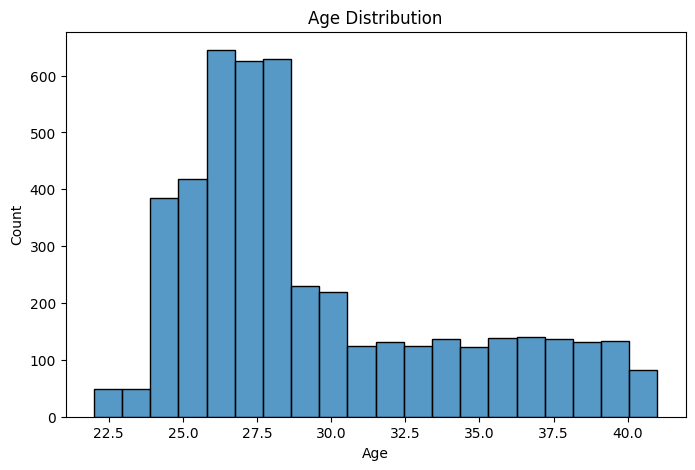

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20)
plt.title("Age Distribution")
plt.show()

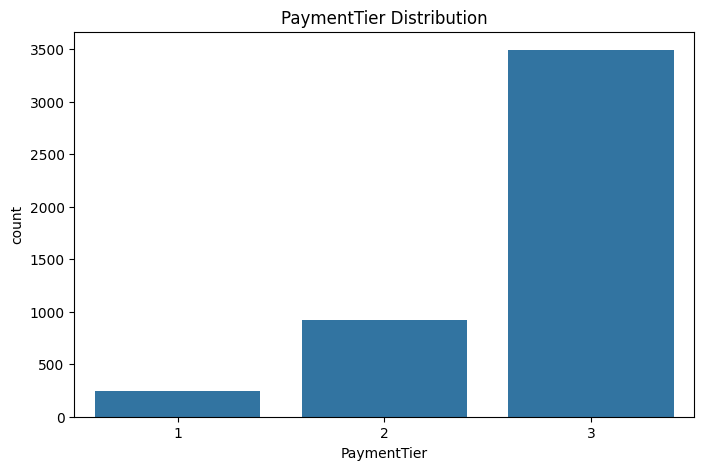

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PaymentTier')
plt.title("PaymentTier Distribution")
plt.show()

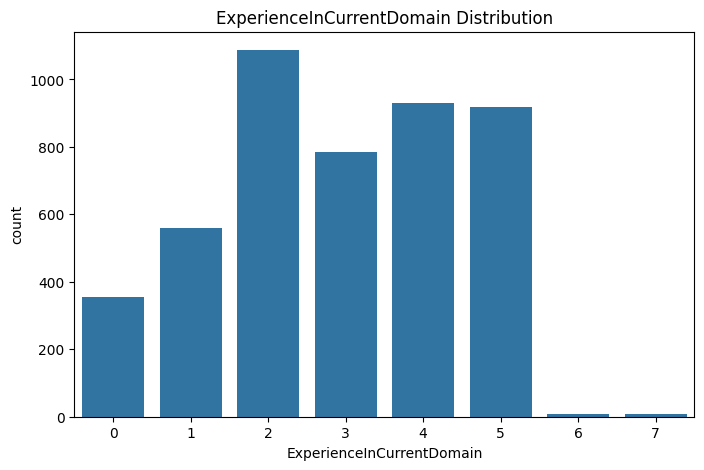

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ExperienceInCurrentDomain')
plt.title("ExperienceInCurrentDomain Distribution")
plt.show()

# 3.3. Correlation Analysis

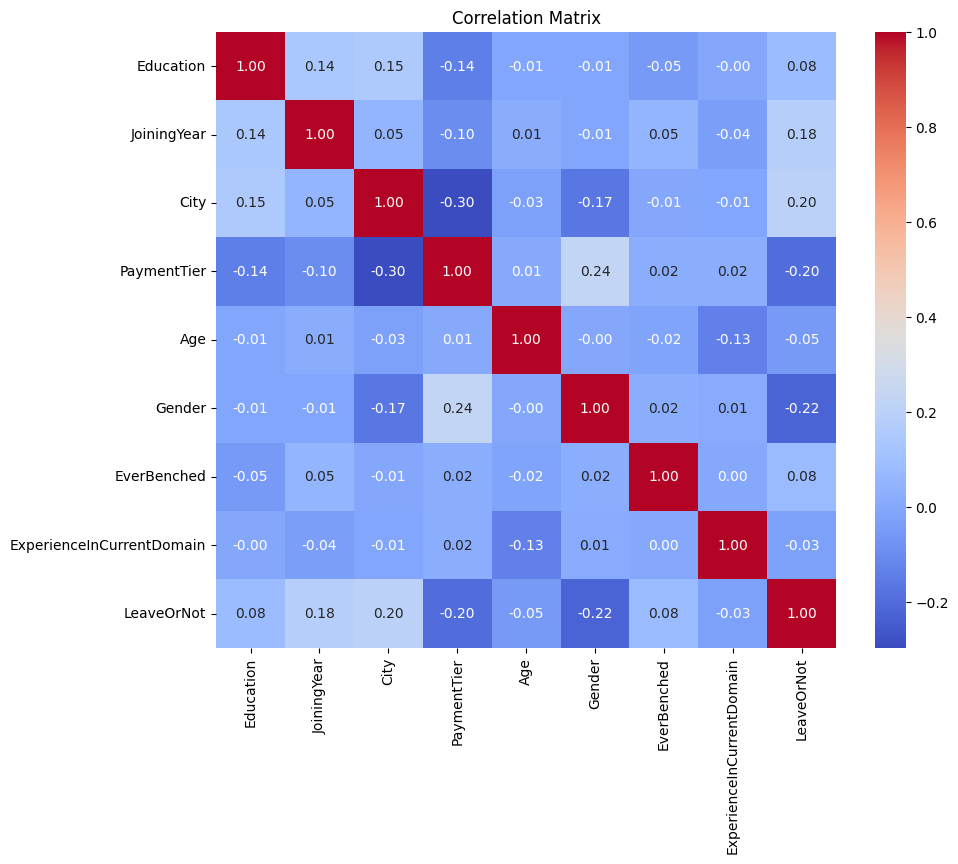

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [16]:
df.shape

(4653, 9)

In [17]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [18]:
df.describe()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.00000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.26456,2015.062970,0.793681,2.698259,29.393295,0.597034,0.102729,2.905652,0.343864
std,0.52112,1.863377,0.841979,0.561435,4.826087,0.490547,0.303638,1.558240,0.475047
min,0.00000,2012.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2013.000000,0.000000,3.000000,26.000000,0.000000,0.000000,2.000000,0.000000
50%,0.00000,2015.000000,1.000000,3.000000,28.000000,1.000000,0.000000,3.000000,0.000000
75%,0.00000,2017.000000,2.000000,3.000000,32.000000,1.000000,0.000000,4.000000,1.000000
max,2.00000,2018.000000,2.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int64
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int64
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int64
 6   EverBenched                4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


In [20]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

# 4.Data Splitting

In [21]:
x = df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 5. Basic Data Visualization

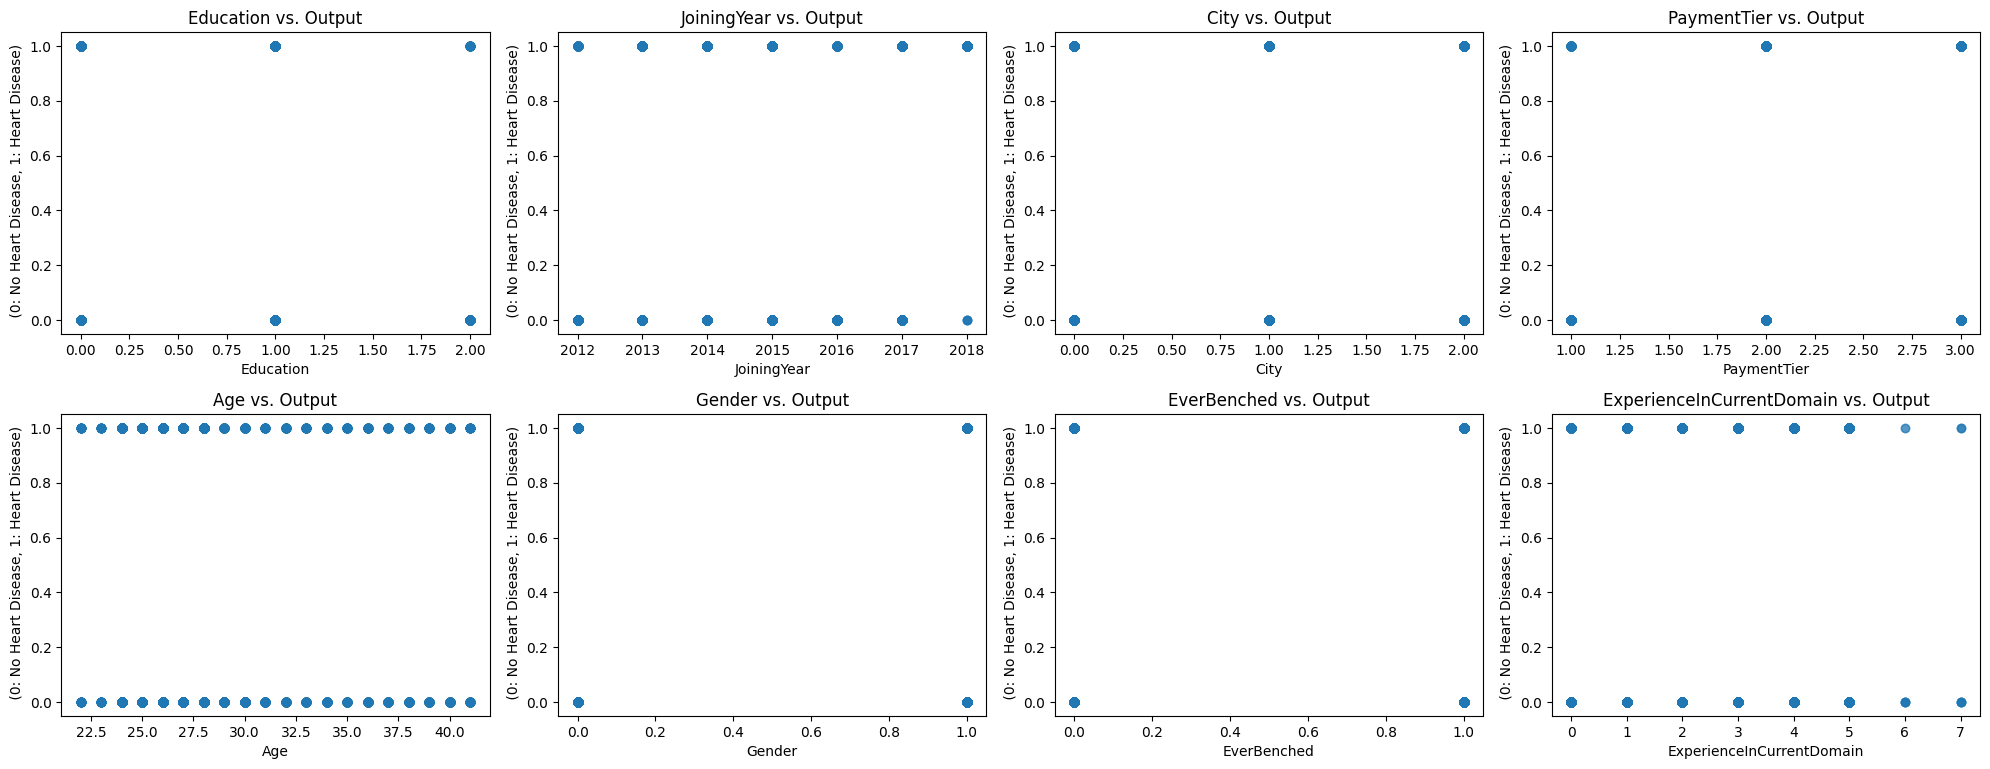

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 15))

for i, column in enumerate(x.columns):
    plt.subplot(4, 4, i + 1)  # Assuming 4x4 grid, adjust as needed
    plt.scatter(x[column], df['LeaveOrNot'], alpha=0.5)
    plt.title(f'{column} vs. Output')
    plt.xlabel(column)
    plt.ylabel(' (0: No Heart Disease, 1: Heart Disease)')
plt.tight_layout()
plt.show()


# 6. StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 7. SVM Model Training and Evaluation

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:\n", confusion_svm)
print("Classification Report:\n", classification_rep_svm)


Support Vector Machine (SVM) Model:
Accuracy: 0.86
Confusion Matrix:
 [[595  15]
 [116 205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       610
           1       0.93      0.64      0.76       321

    accuracy                           0.86       931
   macro avg       0.88      0.81      0.83       931
weighted avg       0.87      0.86      0.85       931



# 8. Saving The Model

In [26]:
import joblib
joblib.dump(svm_model, 'svm.pkl')

['svm.pkl']